In [1]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [2]:
# Parameters
Lx, Lz = 40,1
Nx, Nz = 1280, 32
Ra_M = 2.8e6
M_0 = 0
M_H = -1


Prandtl = 0.7
stop_sim_time = 1700

nu = (Ra_M / (Prandtl*(M_0-M_H)*Lz**3))**(-1/2)

In [3]:
folder_dir = "analysis"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['analysis/analysis_s1.h5', 'analysis/analysis_s2.h5', 'analysis/analysis_s3.h5', 'analysis/analysis_s4.h5', 'analysis/analysis_s5.h5', 'analysis/analysis_s6.h5', 'analysis/analysis_s7.h5', 'analysis/analysis_s8.h5', 'analysis/analysis_s9.h5', 'analysis/analysis_s10.h5', 'analysis/analysis_s11.h5', 'analysis/analysis_s12.h5', 'analysis/analysis_s13.h5', 'analysis/analysis_s14.h5', 'analysis/analysis_s15.h5', 'analysis/analysis_s16.h5']


In [3]:
"""
DEBUGGING CONTROL GROUP
"""
folder_dir = "snapshots"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uuyy = file['tasks']['uy']
        uuxz = file['tasks']['u']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uuuyyy = np.transpose(uuyy[t, :, :])
            uuxz_trans = np.transpose(uuxz[t, :, :])
            print(np.average(uuuyyy), np.sum(np.square(uuuyyy)))
            print(np.average(uuxz_trans), np.sum(np.square(uuxz_trans)),np.max(uuxz_trans), np.min(uuxz_trans))
            uxxuzz = np.ndarray.tolist(uuxz_trans)
            for lay_1 in range(len(uuxz_trans)):
                for lay_2 in range(len(uuxz_trans[lay_1])):
                    modulus = np.linalg.norm(uuxz_trans[lay_1][lay_2])
                    uxxuzz[lay_1][lay_2] = modulus
            to_plot = np.square(uuuyyy)+np.square(uxxuzz)
            all_tot_ke.append(np.sum(to_plot))
            if t == 8:
                break
        print(len(all_tot_ke))
        print(np.max(all_tot_ke))
#print(all_tot_ke[])

0.0 0.0
0.0 0.0 0.0 0.0
6.075505400796694e-15 1.309733938410792e-10
-3.4772099416025505e-13 8.184850539876905e-06 9.021400869183074e-05 -7.326058285553848e-05
3.9099107190468606e-14 6.243193621374254e-10
-1.1894939850631995e-12 1.422831173587859e-05 0.00011648050802849579 -9.523769872768972e-05
1.4396019576451602e-13 2.5983623079792473e-09
-2.736206896351055e-12 2.3477147355767635e-05 0.00013872066715289657 -0.00012134955246495262
2.9676351902217125e-13 6.914410177381474e-09
-4.35803892188477e-12 3.364749653237638e-05 0.00016267612299616645 -0.00013728424934096996
4.4530773362062744e-13 1.2226666660119279e-08
-5.722401030315364e-12 4.2008748556366315e-05 0.00018532264495855238 -0.00015070993628011947
6.451922205286246e-13 1.994541558496256e-08
-7.378088897778112e-12 5.1408814899208394e-05 0.0002156883112126684 -0.00016291617824738239
9.206456922072274e-13 3.068525798279026e-08
-9.408955697557304e-12 6.2170280086403e-05 0.00025820459854408034 -0.00017336150441126926
1.5323735394741028e-

KeyboardInterrupt: 

In [4]:
"""
TOTAL KE
"""

all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke.append(np.sum(tot_ke[t]))
print(all_tot_ke[:10])
print(max(all_tot_ke))
"""
mean KE
"""
all_mean_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke.append(np.average(mean_ke[t]))

[0.0, 1.3448157377313134e-09, 3.5096211569214583e-09, 5.6772104035484355e-09, 7.779442235272929e-09, 1.1923217303302648e-08, 1.4025402072634012e-08, 1.617554222470694e-08, 1.8389243178939133e-08, 2.0679958305611744e-08]
0.504279741736292


15837
15837


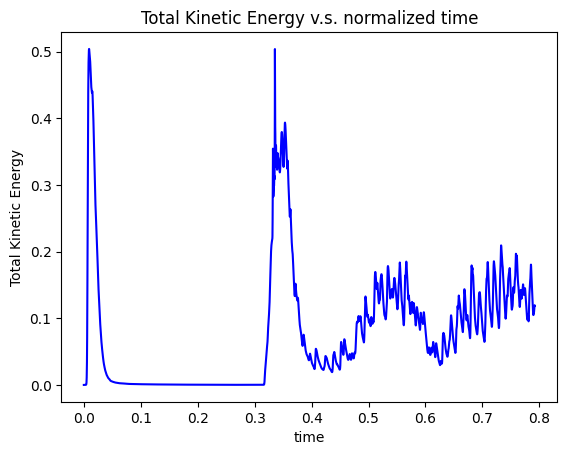

/state/partition1/job-40622197/ipykernel_1750122/2203192914.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')


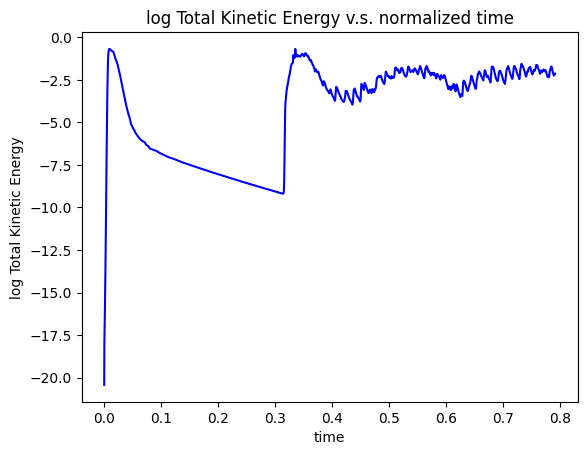

15837
15837


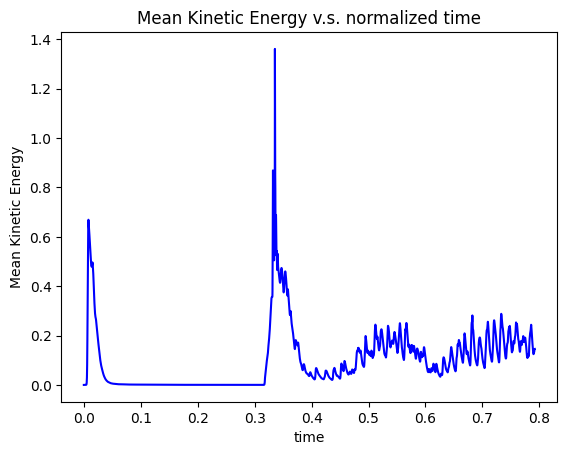

/state/partition1/job-40622197/ipykernel_1750122/2203192914.py:26: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')


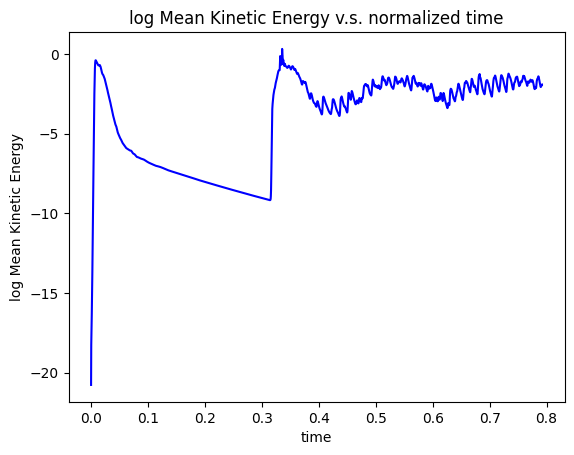

In [5]:
print(len(all_tot_ke))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_ke)+1)])
plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Total Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
print(len(all_mean_ke))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_mean_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_mean_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Mean Kinetic Energy')
plt.title('Mean Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Mean Kinetic Energy')
plt.title('log Mean Kinetic Energy v.s. normalized time')
plt.show()

In [6]:
all_tot_uy = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy.append(uy_each)
print(all_tot_uy[3])
all_tot_ux = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux = file['tasks']['tot ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux_each = ux[t][0][0]
            all_tot_ux.append(ux_each)
print(all_tot_ux[3])
all_tot_uz = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz = file['tasks']['tot uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz_each = uz[t][0][0]
            all_tot_uz.append(uz_each)
print(all_tot_uz[3])

3.445502280887867e-14
-3.781670244397259e-12
2.3149949156087535e-16


15837
15837


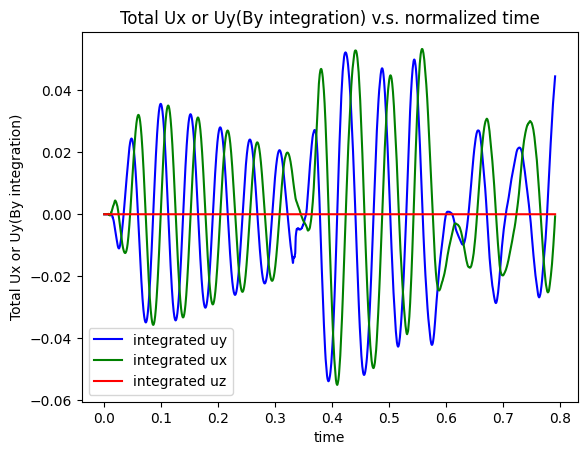

'\nI suspect that, because it is integrated, then total uz is always 0\n'

In [7]:
print(len(all_tot_uy))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.plot(figure_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.plot(figure_x_axis, all_tot_uz, color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()

"""
I suspect that, because it is integrated, then total uz is always 0
"""

In [8]:
all_tot_uy2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy2 = file['tasks']['ke by uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy2_each = uy2[t][0][0]
            all_tot_uy2.append(uy2_each)
print(all_tot_uy2[3])
all_tot_ux2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux2 = file['tasks']['ke by ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux2_each = ux2[t][0][0]
            all_tot_ux2.append(ux2_each)
print(all_tot_ux2[3])
all_tot_uz2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz2 = file['tasks']['ke by uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz2_each = uz2[t][0][0]
            all_tot_uz2.append(uz2_each)
print(all_tot_uz2[3])

8.41866579590116e-14
1.3684731496207953e-09
4.308653067269682e-09


15837
15837


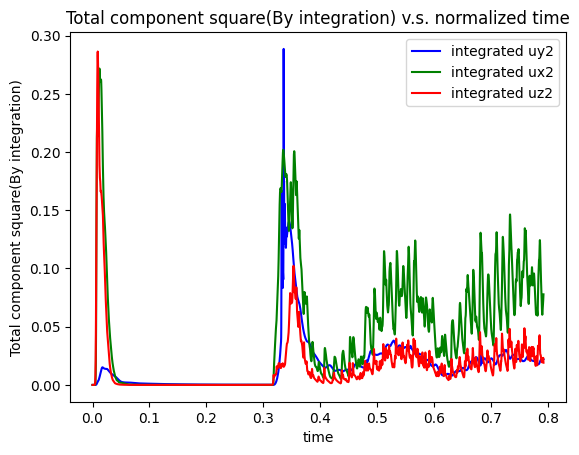

In [9]:
print(len(all_tot_uy2))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_uy2)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy2, color = 'blue', label='integrated uy2')
plt.plot(figure_x_axis, all_tot_ux2, color = 'green', label='integrated ux2')
plt.plot(figure_x_axis, all_tot_uz2, color = 'red', label='integrated uz2')
plt.xlabel('time')
plt.ylabel('Total component square(By integration)')
plt.title('Total component square(By integration) v.s. normalized time')
plt.legend()
plt.show()